<font color='red'>No se aceptan soluciones que usen metodologías distintas a la vistas en clases.</font>

<font color='orange'>Se puede usar el código de los ejemplos vistos en clases.</font>



# 1) Ingrese su Nombre y Número de alumno/a

(1 Punto)

In [1]:
Nombre = 'Jessica Hormazabal' # Por ejemplo: 'Carmen Gloria Perez'
ID     = '15639150' # Por ejemplo: '12345678K'

# Se puede trabajar en grupo, pero la entrega es individual
Integrantes = [ID,'1234','567'] # Coloque aqui los integrantes del grupo si es que no trabajo de forma individual

print('IMPORTANTE: Cambie el nombre del archivo (arriba-izquierda) por '+ID+'.ipynb')

IMPORTANTE: Cambie el nombre del archivo (arriba-izquierda) por 15639150.ipynb


# 2) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm
from   scipy.fftpack     import fft2,ifft2,fftshift,ifftshift
from   scipy.ndimage     import gaussian_filter
from   scipy.signal      import fftconvolve
from google.colab.patches import cv2_imshow

# 3) Filtro Anti-alising

(5 Puntos)
 
Para este ejericio:

* Descargar la siguiente imagen `https://www.dropbox.com/s/1bbbynmdcr8bef1/CamisaRayas.jpg`

* Convertir la imagen a tonos de gris

* Submuestrear la imagen cada 8 pixeles en ambas direcciones (horizontal y vertical) y observar el efecto aliasing en la camisa a rayas.

* Corregir el efecto aliasing en la camisa a rayas usando filtros en el dominio de Fourier. La salida debe ser una imagen del mismo tamaño que la anterior sin el efecto aliasing.






In [8]:
# Cargar imágen
!wget https://www.dropbox.com/s/1bbbynmdcr8bef1/CamisaRayas.jpg
camisaImg = cv2.imread("CamisaRayas.jpg")

--2021-10-07 11:59:21--  https://www.dropbox.com/s/1bbbynmdcr8bef1/CamisaRayas.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1bbbynmdcr8bef1/CamisaRayas.jpg [following]
--2021-10-07 11:59:22--  https://www.dropbox.com/s/raw/1bbbynmdcr8bef1/CamisaRayas.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc85e294f4b4c025f327fb3fdfea.dl.dropboxusercontent.com/cd/0/inline/BXmepjPpzjFHjt7IOMbpSNYXHlkNjmjmrJh834YwovdCp1weiNW5w5KPZALctV9UP-MYK-pz1gM3jGK6ooE7_4XvNy65QTJ-KJvNogaEkqyJ40GVdr84j5BBeFjkr6QxX17RWqOOjsa0KoynOv-8Cvwk/file# [following]
--2021-10-07 11:59:22--  https://uc85e294f4b4c025f327fb3fdfea.dl.dropboxusercontent.com/cd/0/inline/BXmepjPpzjFHjt7IOMbpSNYXHlkNjmjmrJh834YwovdCp1weiNW5w5KPZALctV9UP-MYK-pz1gM3jGK6

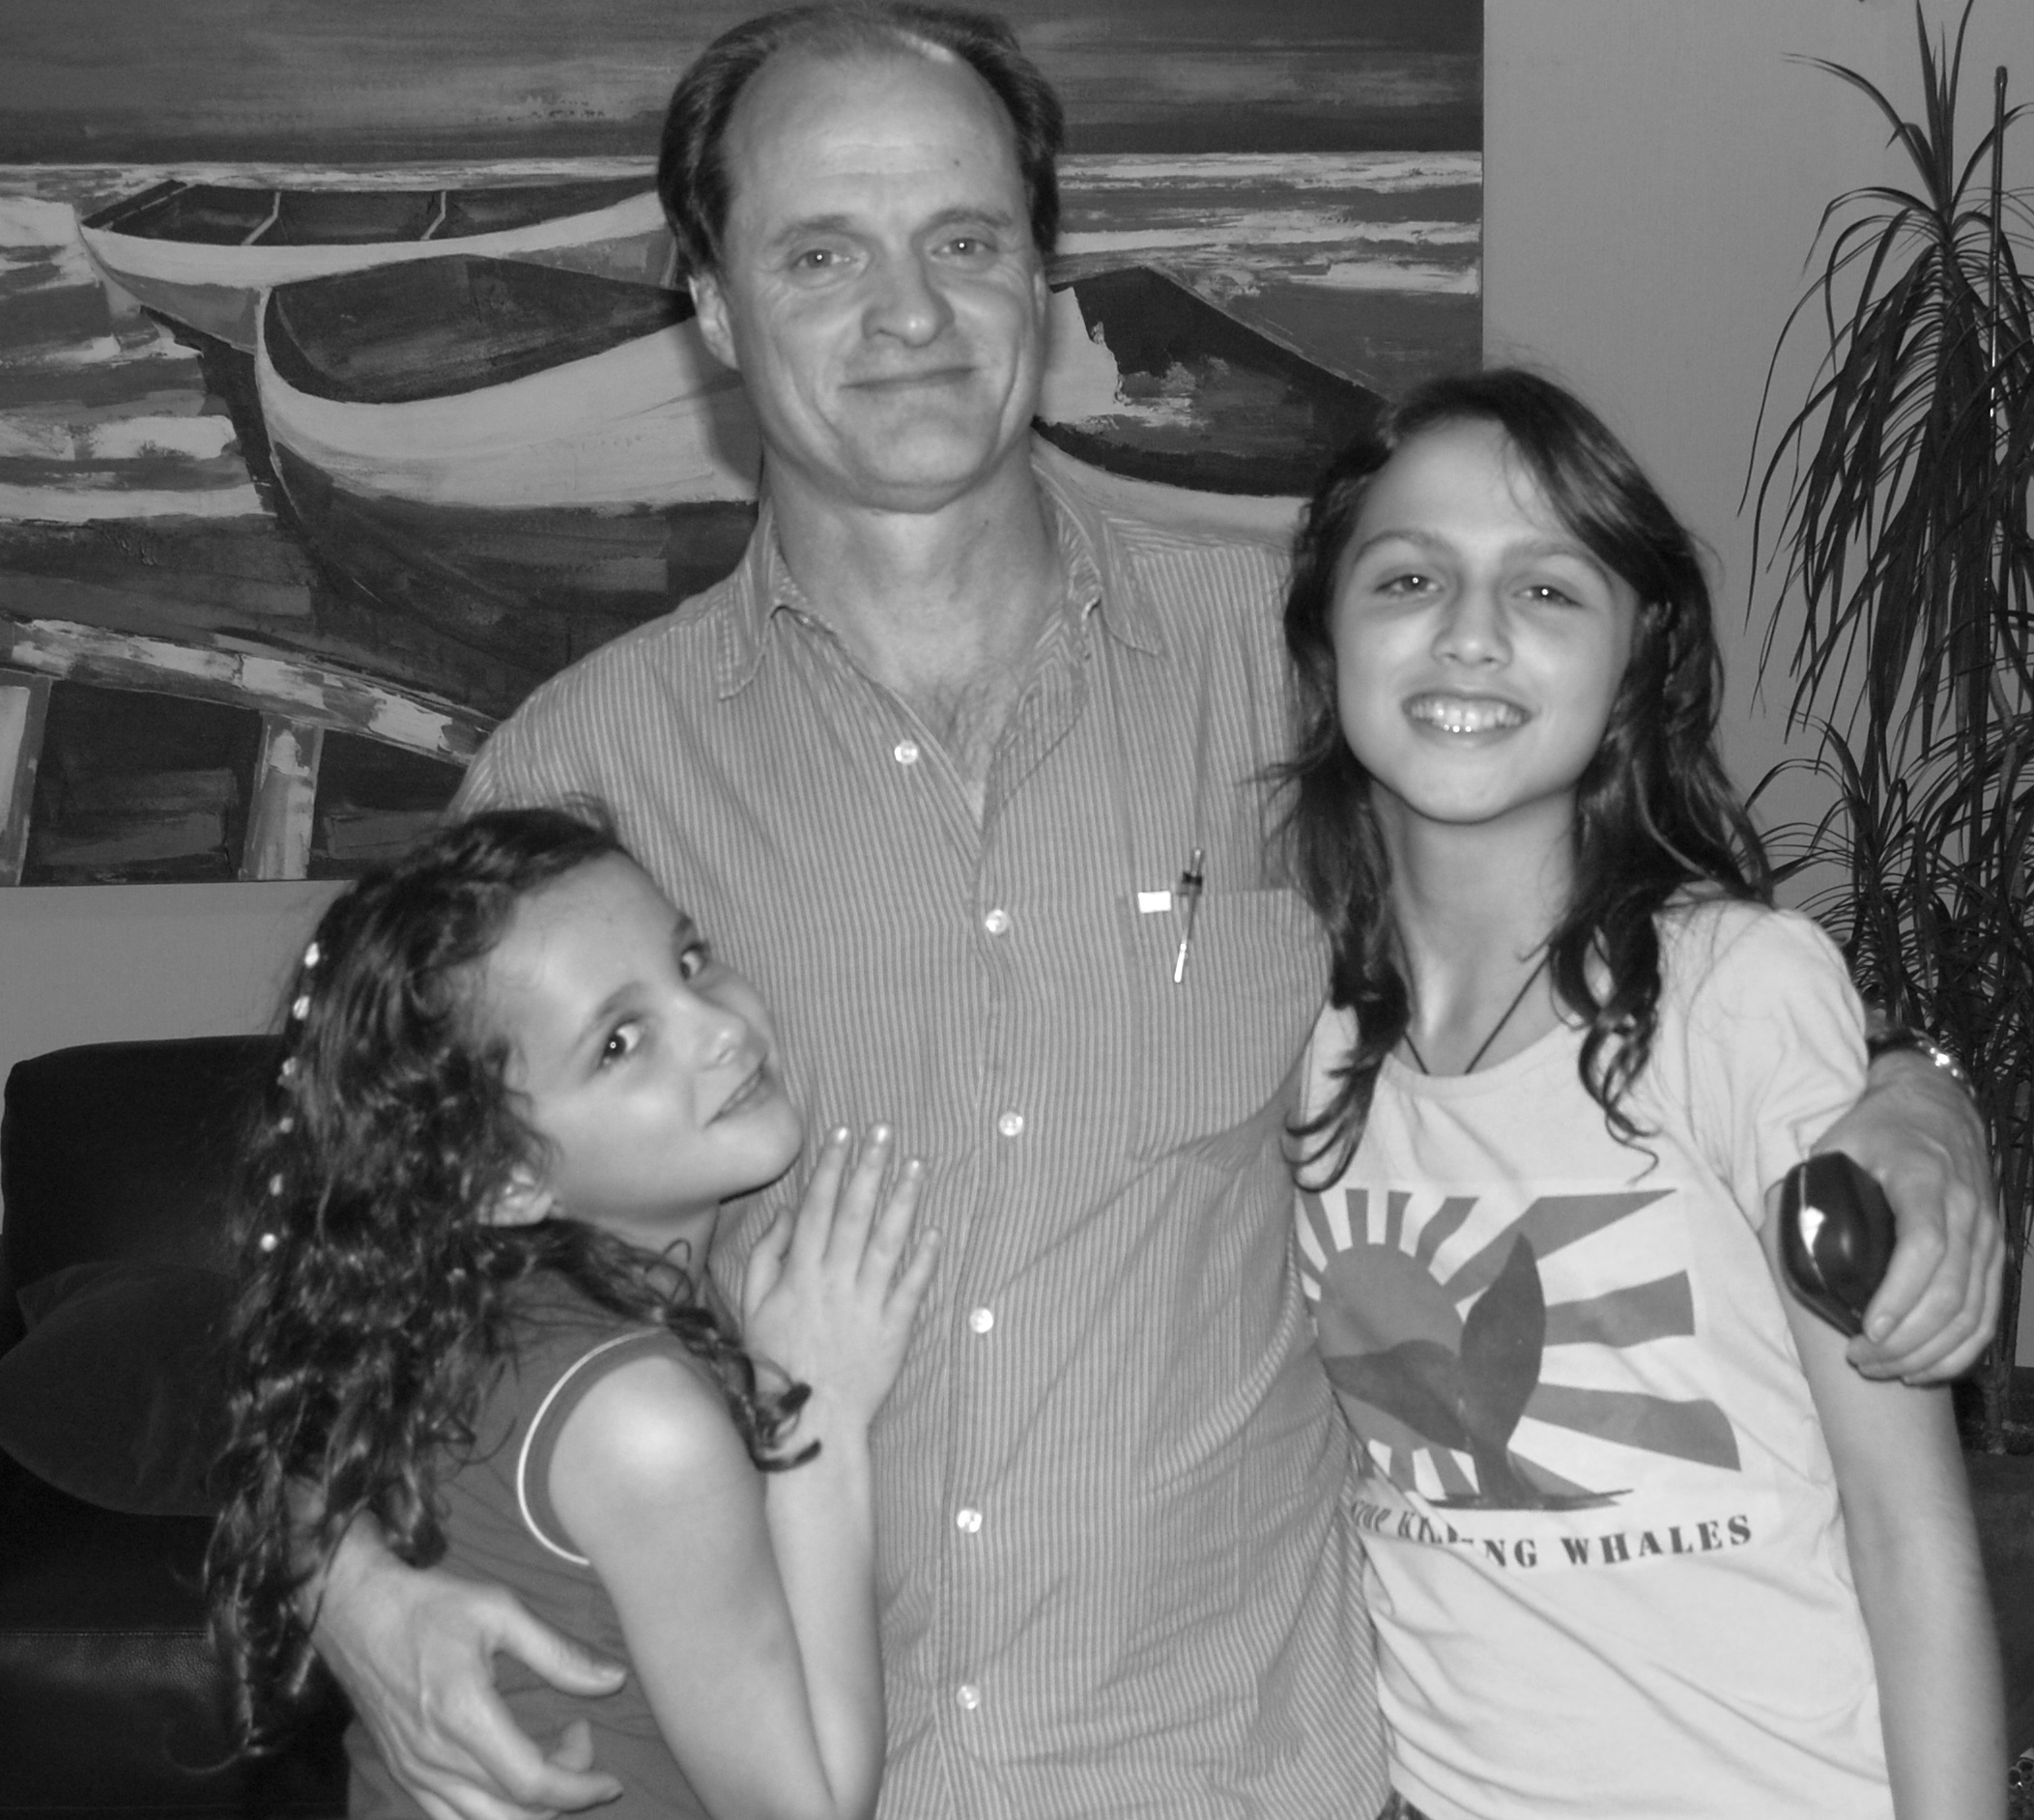

In [11]:
# Convertir a tono de gris
camisaGray = cv2.cvtColor(camisaImg, cv2.COLOR_BGR2GRAY)
cv2_imshow(camisaGray)

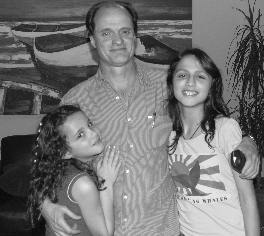

In [12]:
# Submuestrear imágen cada 8 pixeles horizontal y verticalmente.
"""
Submuestrear es eliminar horizontal y verticalmente pixeles... En este caso cada 8 pixeles.
"""
A = camisaGray.copy() # Original
Submuestreo = A[::8,::8]
cv2_imshow(Submuestreo)

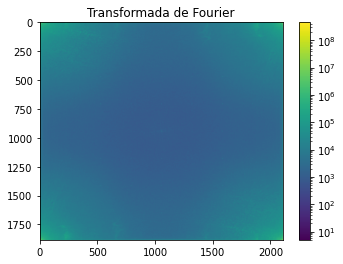

In [14]:
# Corregir el efecto aliasing en la camisa a rayas usando filtros en el dominio de Fourier. La salida debe ser una imagen del mismo tamaño que la anterior sin el efecto aliasing.
def graficar_espectro(fft_image):
  plt.imshow(np.abs(fft_image), norm=LogNorm(vmin=5))
  plt.colorbar()

fft_image = fft2(camisaGray)
plt.figure()
graficar_espectro(fft_image)
plt.title('Transformada de Fourier')
plt.show()

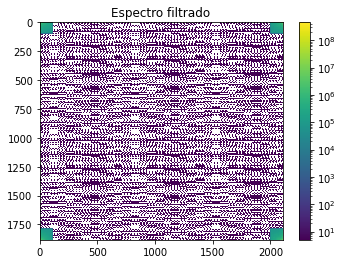

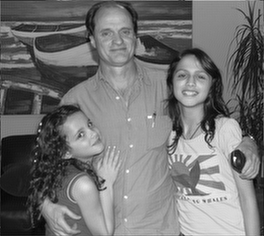

In [77]:
# Ahora debo descubrir cómo limpiar las rayas... usaré la eliminación de ruido, rogando elegir el coeficiente correcto. Este método lo deja muchísimo más nítido xD
copy_fft = fft_image.copy()
R,C = copy_fft.shape
keep_fraction = 0.05
copy_fft[int(R*keep_fraction):int(R*(1-keep_fraction))] = 0.0
copy_fft[:, int(C*keep_fraction):int(C*(1-keep_fraction))] = 0.0
plt.figure()
graficar_espectro(copy_fft)
plt.title('Espectro filtrado')
plt.show()

new_img = ifft2(copy_fft).real
cv2_imshow(new_img[::8,::8])

Imagen filtrada y submuestrada


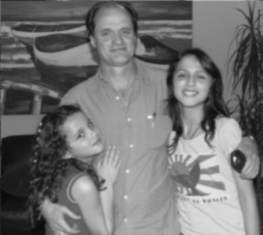

In [82]:
#Otra forma puede ser con el filtro gausiano pasa bajos
def subsampling(X,s):
  (N,M) = X.shape
  N2 = int(N/s)
  M2 = int(M/s)

  Y = np.zeros((N2,M2))
  for i2 in range(N2):
    i = int(i2*s)
    for j2 in range(M2):
      j = int(j2*s)
      Y[i2,j2] = X[i,j]
  return Y

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

X = camisaGray.copy()
X_ft = fft2(X)
X_ftc = fftshift(X_ft)

Do = 50

Yo_ftc = X_ftc * gaussianLP(Do,X.shape)
Yo_ft = ifftshift(Yo_ftc)
Yo = ifft2(Yo_ft).real

Y  = subsampling(Yo, 8)

#print("Imagen filtrada")
#cv2_imshow(Yo)

print("Imagen filtrada y submuestrada")
cv2_imshow(Y)


# 4) Eliminación de Ruido
(4 Puntos)

Para este ejercicio, 

* Descargar la imagen `https://www.dropbox.com/s/d3uqhtmpjrhfvlp/sailing_noise.png`

* Eliminar el ruido de la imagen usando un filtro Butterworth adecuado, es decir que no se vean anillos de replica alrededor del velero de la imagen.


<font color='orange'>NOTA: En este ejercicio se espera que elimine completamente el ruido de alta frecuencia, el resultado será una imagen borrosa sin ruido.</font>


--2021-10-07 12:43:42--  https://www.dropbox.com/s/d3uqhtmpjrhfvlp/sailing_noise.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/d3uqhtmpjrhfvlp/sailing_noise.png [following]
--2021-10-07 12:43:43--  https://www.dropbox.com/s/raw/d3uqhtmpjrhfvlp/sailing_noise.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2f74d55bf196267f0bffc870f3.dl.dropboxusercontent.com/cd/0/inline/BXlmjG2T9pW15dimRAlGO4qNcsoqw3oto779TOFebN5rfWYecQagKs4qfeInfGGcFjxGwSsSkF3-UaBjLc-SlIpnYgyro2L_Qhx-bjqXA-JfRhHKqrjWg1bUid4hmsdylYMvdrc1-KzgopugMZ3FXmdC/file# [following]
--2021-10-07 12:43:43--  https://uc2f74d55bf196267f0bffc870f3.dl.dropboxusercontent.com/cd/0/inline/BXlmjG2T9pW15dimRAlGO4qNcsoqw3oto779TOFebN5rfWYecQagKs4qfeInfGGcFjxGwSsS

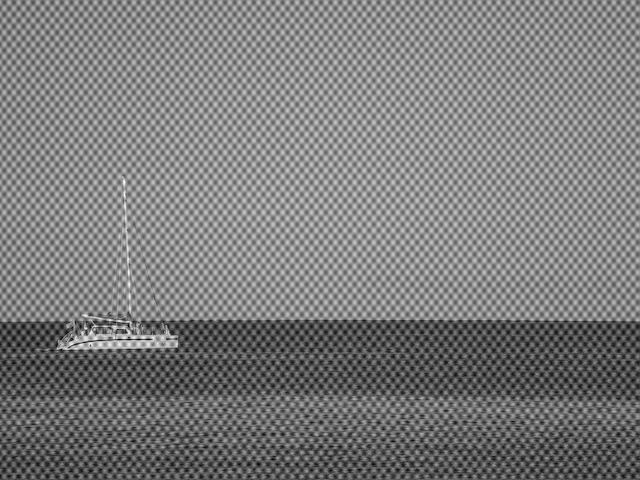

In [28]:
# Cargar imagen
!wget https://www.dropbox.com/s/d3uqhtmpjrhfvlp/sailing_noise.png
imgNoisy = cv2.imread("sailing_noise.png")
noisyGray = cv2.cvtColor(imgNoisy, cv2.COLOR_BGR2GRAY)
cv2_imshow(noisyGray)

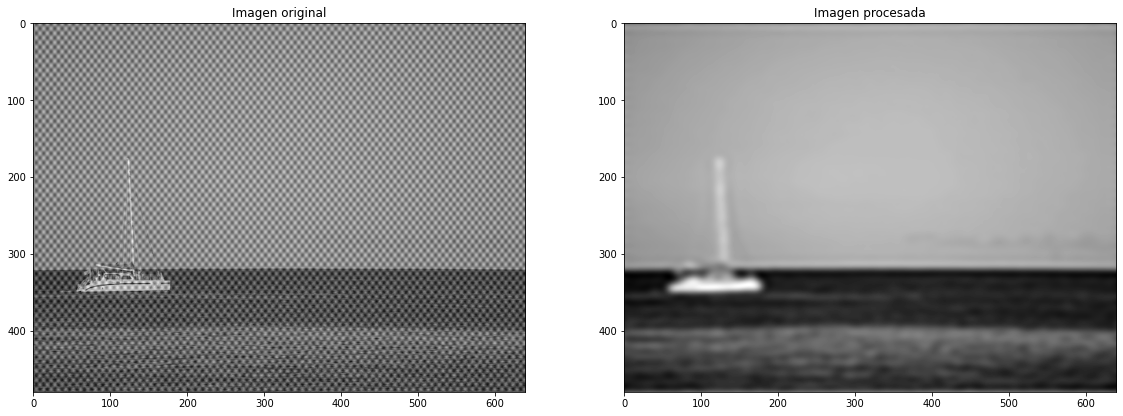

In [211]:
# Eliminar el ruido de la imagen usando un filtro Butterworth adecuado, es decir que no se vean anillos de replica alrededor del velero de la imagen.
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

X = noisyGray.copy()
Do     = 32 # frecuencia de corte

n = 4
H = butterworthLP(Do,X.shape,n)

plt.figure(figsize=(30,15))
plt.subplot(231), plt.imshow(X, "gray"), plt.title("Imagen original")

X_ft = fft2(X)
H_c = fftshift(H)
Y_ft = X_ft * H_c
X_new = ifft2(Y_ft)
plt.subplot(232), plt.imshow(np.abs(X_new), "gray"), plt.title("Imagen procesada")

plt.show()

# 5) Filtro de agudización

(5 puntos)

Para el siguiente ejercicio,

* Descargar la imagen almacenada en `https://www.dropbox.com/s/61ryk6r0wd72gqh/blurdrops.png`

* Usando un filtro de agudización que utilice un filtro Gaussiano resalte los detalles de la imagen.


<font color='orange'>NOTA: En este ejercicio se espera una imagen de salida más nítida.</font>




--2021-10-07 14:43:12--  https://www.dropbox.com/s/61ryk6r0wd72gqh/blurdrops.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/61ryk6r0wd72gqh/blurdrops.png [following]
--2021-10-07 14:43:12--  https://www.dropbox.com/s/raw/61ryk6r0wd72gqh/blurdrops.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc800743e212498449ceb63f226e.dl.dropboxusercontent.com/cd/0/inline/BXmCfrdDOkf98IOBhKhlh71U-HmWTVZJ1CEas4nJQMF5ifqvnovZP_cDX7un27rYSUQA18ptZ--2ENaxkrtrRrrwP9zq0LzMDX8q5cr1mjg8WoyXCQFnFGsW0n1wXkGEXtJTYsCZc6Xr16TmsoPiKcJk/file# [following]
--2021-10-07 14:43:12--  https://uc800743e212498449ceb63f226e.dl.dropboxusercontent.com/cd/0/inline/BXmCfrdDOkf98IOBhKhlh71U-HmWTVZJ1CEas4nJQMF5ifqvnovZP_cDX7un27rYSUQA18ptZ--2ENaxkrtr

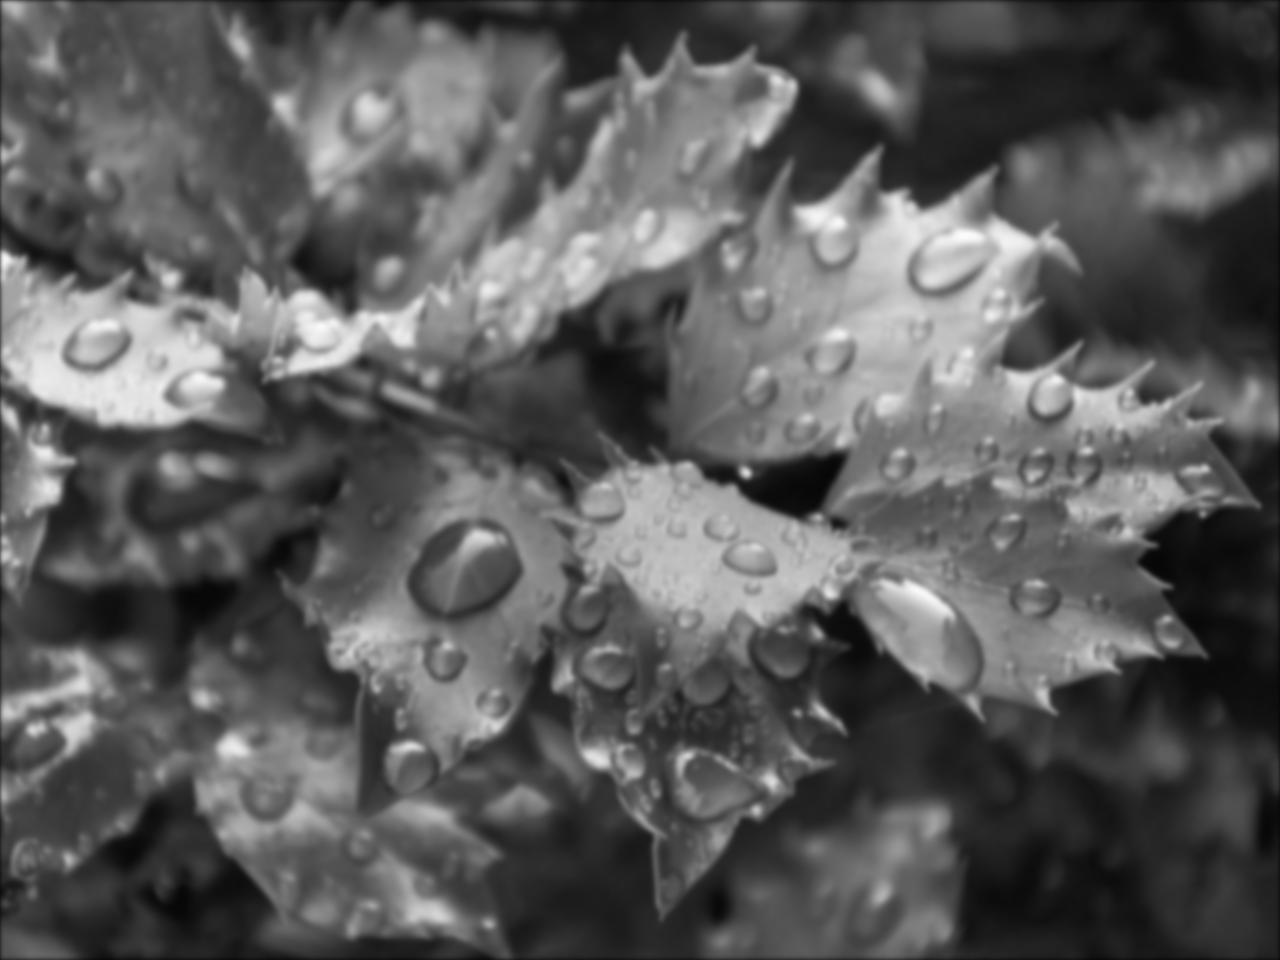

In [166]:
!wget https://www.dropbox.com/s/61ryk6r0wd72gqh/blurdrops.png
imgBlur = cv2.imread("blurdrops.png")
blurGray = cv2.cvtColor(imgBlur, cv2.COLOR_BGR2GRAY)
cv2_imshow(blurGray)

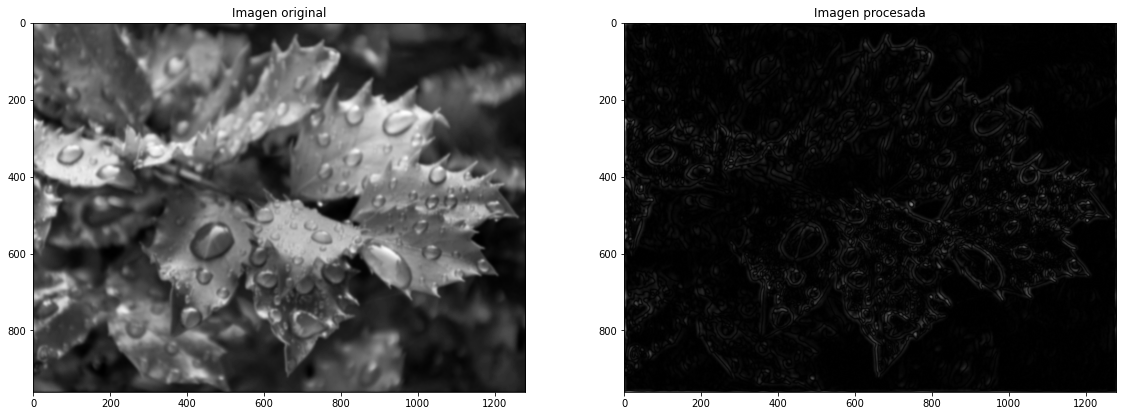

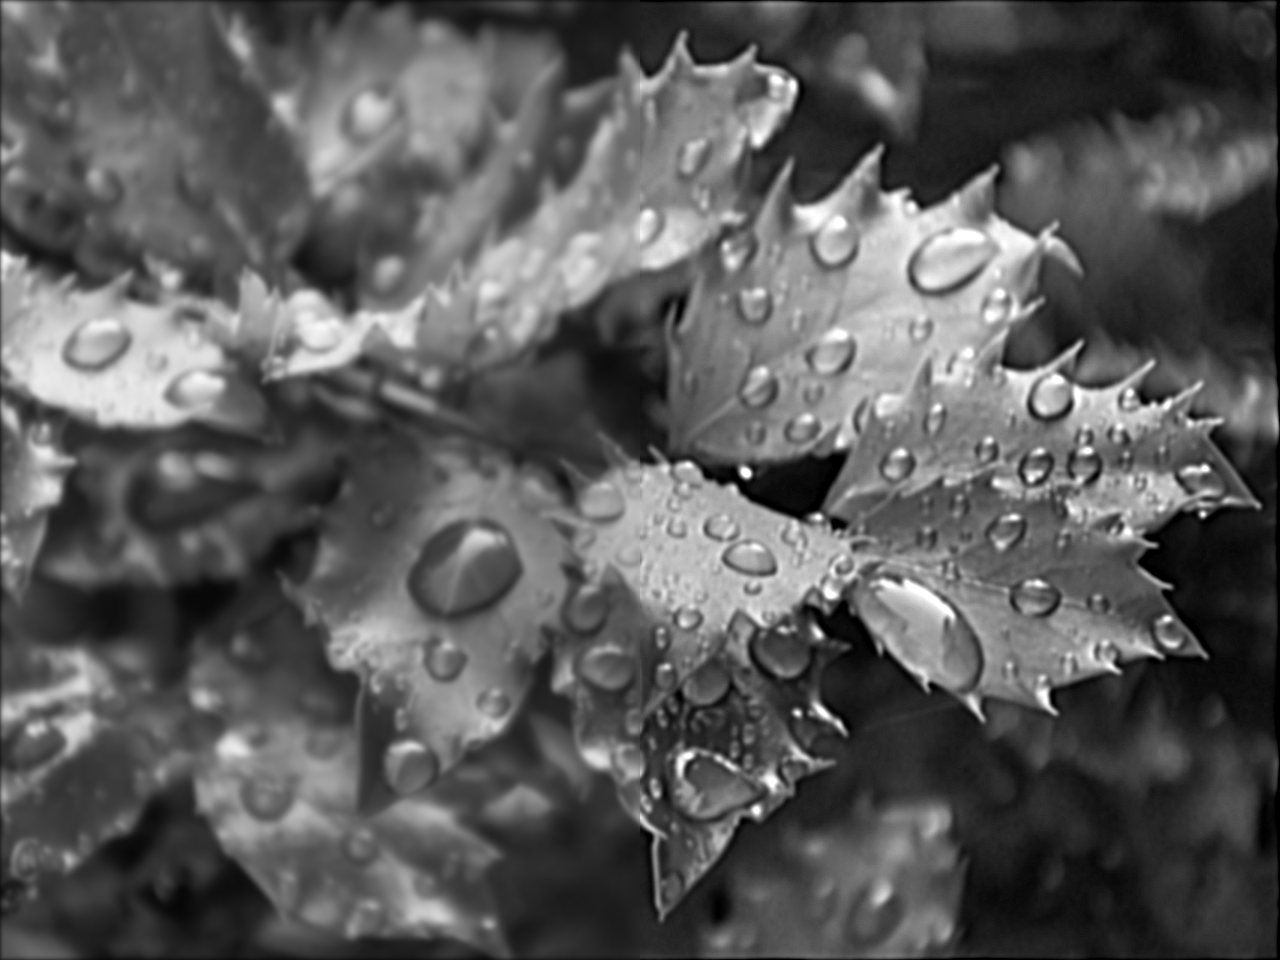

In [209]:
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

Do     = 60 # frecuencia de corte # 35
Ponderador = 3
H = gaussianLP(Do,X.shape)
H = 1-H #Ahora Filtro pasa altos
X = blurGray.copy()

plt.figure(figsize=(30,15))
plt.subplot(231), plt.imshow(X, "gray"), plt.title("Imagen original")


X_ft = fft2(X)
H_c = fftshift(H)
Y_ft = X_ft * H_c
X_new = ifft2(Y_ft).real
plt.subplot(232), plt.imshow(np.abs(X_new), "gray"), plt.title("Imagen procesada")
plt.show()

N,M = X.shape
mitad = M//2
combinacion = np.hstack((X[:,:mitad], X[:,mitad:] + Ponderador*X_new[:,mitad:]))
cv2_imshow(combinacion)

A pesar de notar una diferencia, creo seriamente que quizás la ecualización de la imágen podría dar un mejor resultado. Aunque, sí que se ve más nítida la procesada que la original, al verlas de tamaño completo, siguen siendo borrosas.

# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A GOOGLE CLASSROOM</font> 

<font color='orange'>(subir archivo NumeroAlumnx.ipynb) </font>

# (Class code: khcdh57) 
